In [48]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import geopandas as gp
import seaborn as sns

In [42]:
ntl = pd.read_csv('../data/nightlights/nightlights.csv')

In [43]:
ntl

,ID,DHSCLUST,ntllon,ntllat,ntl2016,pop_sum
0,0,"PH201700000387, PH201700000395",120.554167,18.212500,0.49878,446.725863
1,3,"PH201700000395, PH201700000387",120.554167,18.200000,0.29817,16.787817
2,4,"PH201700000387, PH201700000395",120.554167,18.195833,0.63710,151.090350
3,5,"PH201700000395, PH201700000387",120.554167,18.191666,2.96224,488.236374
4,6,"PH201700000387, PH201700000395",120.558334,18.216666,0.47865,78.833976
...,...,...,...,...,...,...
134535,323235,PH201700000726,122.683334,12.358333,0.13777,186.621899
134536,323236,PH201700000726,122.683334,12.354166,0.00000,12.441460
134537,323239,PH201700000726,122.683334,12.341666,0.00000,483.555064
134538,323240,PH201700000726,122.687501,12.362499,0.17369,141.463403


In [44]:
ntl_gdf = gp.GeoDataFrame(ntl, geometry=gp.points_from_xy(ntl.ntllon, ntl.ntllat), crs='EPSG:4326')
ntl_gdf.to_crs('+proj=cea', inplace=True)

In [45]:
admindiv = gp.read_file('../data/internet/ph_level2admin/PHL_adm2.shp').to_crs('+proj=cea')
municipal_ntl = gp.sjoin(ntl_gdf, admindiv, how='inner', op='within')

In [81]:
admindiv = gp.read_file('../data/internet/ph_level2admin/PHL_adm2.shp').to_crs('+proj=cea')
_  = admindiv.set_index('NAME_2', inplace=True)
avg_ntl = municipal_ntl.groupby('NAME_2').mean('ntl2016')['ntl2016']
admindiv['avg_ntl'] = avg_ntl 
admindiv['avg_ntl'].fillna(0, inplace=True)

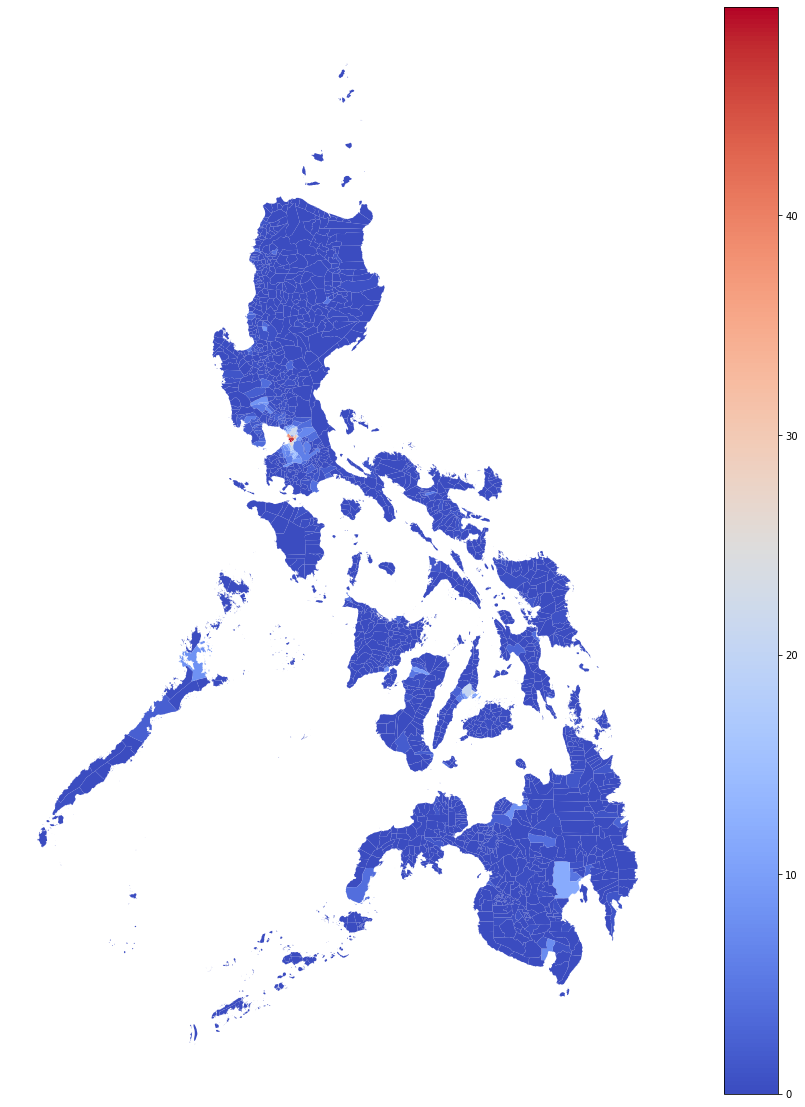

In [82]:
_ = admindiv.plot(figsize=(20,20), column='avg_ntl', cmap='coolwarm', legend=True)
sns.despine(left=True, bottom=True)
plt.xticks([]); plt.yticks([])
plt.savefig('../images/ph_ntl_admlv2.png', transparent=True, pad_inches=0, dpi=300)